--------------------------------------------------
a = 2.5831193295145436 ± 0.6954982386279803
b = -0.5054224469426787 ± 0.5096820631633127
χ²/ndof = 0.9157560172079431


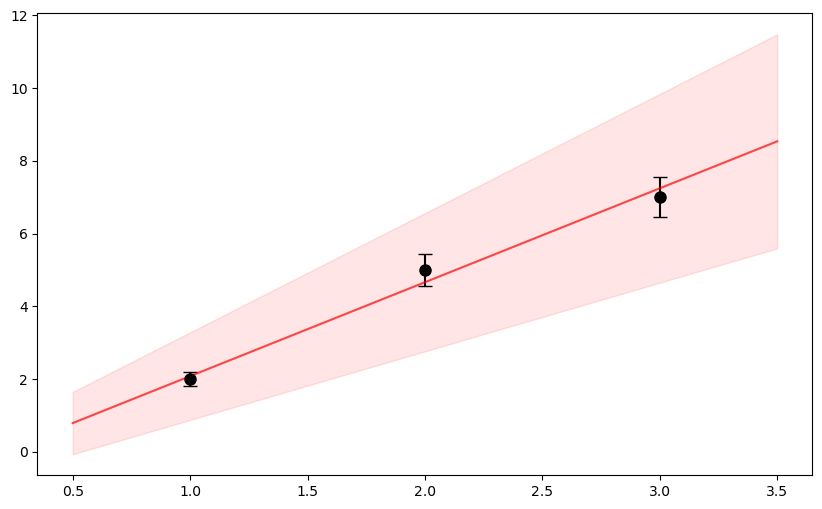

In [5]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

def model(x, a, b):
    return a * x + b

# Data
x = np.array([1, 2, 3])
y = np.array([2, 5, 7])
yerr = np.array([0.2, 0.45, 0.55])

cost = LeastSquares(x, y, yerr, model)
m = Minuit(cost, a=1, b=0)

confidence_levels = [0.68, 0.90, 0.99]


plt.figure(figsize=(10, 6))
plt.errorbar(x, y, yerr=yerr, fmt='o', color='black', 
             label='Data', markersize=8, capsize=5)

# Colors for different confidence levels
colors = ['red', 'green', 'blue']

# Calculate errordef for this confidence level
errordef = scipy.stats.chi2.ppf(0.9, 2)  # 2 parameters (a, b)

# Reset and perform fit with this errordef
m.reset()
m.errordef = errordef
m.strategy = 1
m.precision = 0.0006


# m.migrad(ncall=27)
m.simplex(ncall=500_000)


# Get fitted parameters
a_fit = m.values['a']
b_fit = m.values['b']
a_err = m.errors['a']
b_err = m.errors['b']

# Plot fitted line
x_fit = np.linspace(0.5, 3.5, 100)
y_fit = model(x_fit, a_fit, b_fit)
plt.plot(x_fit, y_fit, '-', color='red', alpha=0.7)

# Plot uncertainty band
y_upper = model(x_fit, a_fit + a_err, b_fit + b_err)
y_lower = model(x_fit, a_fit - a_err, b_fit - b_err)
plt.fill_between(x_fit, y_lower, y_upper, color='red', alpha=0.1)

# Print results
print(50*"-")
print(f"a = {a_fit} ± {a_err}")
print(f"b = {b_fit} ± {b_err}")
print(f"χ²/ndof = {m.fval/m.ndof}")


# Finalize plot
# plt.xlabel('x', fontsize=14)
# plt.ylabel('y', fontsize=14)
# plt.title('Linear Fit with Different Confidence Levels', fontsize=16)
# plt.legend(fontsize=10, loc='upper left')
# plt.grid(True, alpha=0.3)
# plt.xlim(0.5, 3.5)
# plt.ylim(1, 8)
# plt.tight_layout()
# plt.show()

# a = 2.6138828633401596 ± 0.5705117339949276
# b = -0.5791757049896514 ± 0.8540842791819783
# χ²/ndof = 0.86767895878525